### BH
<br>

## Group 24 <br>

# Franchise 500
<br>

#### Name of Students: 
Dan Sayada<br>
Shimon Yaffa<br>
Eithan Lechsayer<br>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
url= r"https://raw.githubusercontent.com/ChadSim/firstPro/main/franchise500.csv"

df=pd.read_csv(url, encoding=' latin-1')

# Guess which are the higest valued Israeli companies in 2015
<br>
<br>
<br>
<br>
<br>
<br>

<div>
<img src="https://github.com/ChadSim/images/blob/main/ilBest2015.png?raw=true" width="700"/> 
</div>

<br>
<br>

## We find that 5 banks are the highest grossing companies and only one technology company
<br>
<br>

# What about today?


<div>
<img src="https://github.com/ChadSim/images/blob/main/ilBest2024.png?raw=true" width="1200"/> 
</div>


<br>


## We see a complete turnover, 6 technology companies are in the top 10 and only 3 bank companies are included in the list
<br>
<br>
<br>
<br>

# Franchise 500

<div>
<img src="https://github.com/ChadSim/images/blob/main/topFranchise.jpg?raw=true" width="1200"/> 
</div>

## About our data:

#### The Franchise 500 is an annual ranking of the top 500 franchising companies in the U.S. and Canada, Has been published annually since 1980.  Note: this data is ffrom 2016.


#### This year marks the 45th annual Franchise 500—still the world’s first, best, and most comprehensive franchise ranking. If you’re looking to buy a franchise, this is your definitive guide. If you’re a franchisor, this is where your hard work is recognized.
----
<br>
<br>

----
## In the following presentation, we will look through the lense of an entrepreneur looking to buy a franchise, our goal is to help them to understand the data and supply a few guidlines that will help them make the best desicion.

In [3]:
df.columns

Index(['Entreupeneur Profile', '2016 Rank', 'Company', 'Category Detail',
       'Franchise 500 Rank', 'Initial Investment', 'High',
       'Change In Units 1 Yr', 'Change In Units 3 Yr', 'Founded',
       'Franchising Since', 'Corporate Address', 'Ceo', 'Parent Company',
       'About', 'Net Worth Requirement', 'Liquid Cash Requirement',
       'Initial Franchise Fee', 'Financing Options', 'Veteran Incentives',
       'Previous Ranks', 'Highest Rank', 'Lowest Rank',
       'Where Seeking Franchisees', 'Operations'],
      dtype='object')

In [4]:
#pip install wordcloud

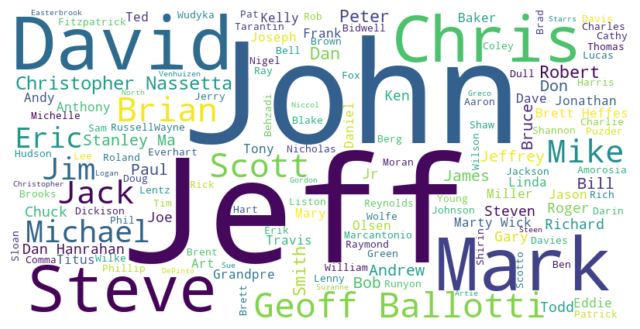

In [5]:
text = ' '.join(df['Ceo'].astype(str))

wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(text)

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


- ### we notice that most popular names of ceo's start with the letter 'J', hence to relation to JESUS OR JEWISH

-----
-----
<br>
<br>
<br>

### cleaning the data

In [6]:
df.head(5)

,Entreupeneur Profile,2016 Rank,Company,Category Detail,Franchise 500 Rank,Initial Investment,High,Change In Units 1 Yr,Change In Units 3 Yr,Founded,...,Net Worth Requirement,Liquid Cash Requirement,Initial Franchise Fee,Financing Options,Veteran Incentives,Previous Ranks,Highest Rank,Lowest Rank,Where Seeking Franchisees,Operations
0,https://www.entrepreneur.com/franchises/jimmyj...,1,Jimmy John's Sandwiches,Sandwiches,#1 Franchise 500,"$325,500","$555,000",+9.0% +205 UNITS,+22.5% +514 UNITS,1983,...,"$300,000","$80,000","$35,000",Jimmy John's Sandwiches has relationships with...,NaN,NaN,1.0,85.0,throughout the US,Training Onsite: 20 days;Training at headquart...
1,https://www.entrepreneur.com/franchises/hampto...,2,Hampton by Hilton,Midprice hotels,#2 Franchise 500,"$4,213,600","$14,896,500",+4.4% +90 UNITS,+5.7% +117 UNITS,1983,...,NaN,NaN,"$75,000",Hampton by Hilton has relationships with third...,NaN,NaN,1.0,48.0,worldwide,Training Onsite: varies;Training at headquarte...
2,https://www.entrepreneur.com/franchises/superc...,3,Supercuts,Hair salons,#3 Franchise 500,"$144,400","$293,800",+5.3% +136 UNITS,+8.8% +225 UNITS,1975,...,"$500,000","$150,000","$29,500",Supercuts has relationships with third-party s...,"$2,500 rebate on first-store franchise fee",NaN,3.0,40.0,NaN,Training at headquarters: 5 days;Additional Tr...
3,https://www.entrepreneur.com/franchises/servpr...,4,Servpro,Insurance/disaster restoration and cleaning,#4 Franchise 500,"$156,075","$209,950",+1.8% +30 UNITS,+4.7% +80 UNITS,1967,...,NaN,"$105,000","$46,000",Servpro offers in-house financing to cover the...,NaN,NaN,4.0,43.0,NaN,Training Onsite: 5 days;Training at headquarte...
4,https://www.entrepreneur.com/franchises/subway...,5,Subway,"Subs, salads",#5 Franchise 500,"$116,600","$263,150",+1.7% +768 UNITS,+9.4% +4149 UNITS,1965,...,"$80,000 - $310,000","$30,000 - $90,000","$15,000",Subway offers in-house financing to cover the ...,Franchise fee waived if opening on a military/...,NaN,1.0,9.0,worldwide,Training Onsite: 10 days;Training at headquart...


- # cleaning the data

In [7]:
# cleaning the $ signs

df['Liquid Cash Requirement'] = df['Liquid Cash Requirement'].replace({'\$':''}, regex = True)  
df['Initial Franchise Fee'] = df['Initial Franchise Fee'].replace({'\$':''}, regex = True)  
df['Net Worth Requirement'] = df['Net Worth Requirement'].replace({'\$':''}, regex = True) 
df['Initial Investment'] = df['Initial Investment'].replace({'\$':''}, regex = True) 
df['High'] = df['High'].replace({'\$':''}, regex = True) 
df['Net Worth Requirement'] = df['Net Worth Requirement'].replace({'\$':''}, regex = True)

In [8]:
# change in units have two values per single tuple, we will devide the values and desposit them into two seperate columns

df[['Percentage1', 'Units1']] = df['Change In Units 1 Yr'].str.extract(r'([+-]?\d*\.\d+|\d+)%\s*([+-]?\d+)\s*UNITS')
df[['Percentage3', 'Units3']] = df['Change In Units 3 Yr'].str.extract(r'([+-]?\d*\.\d+|\d+)%\s*([+-]?\d+)\s*UNITS')

In [9]:
# cleaning the '+' signs

df['Percentage1'] = df['Percentage1'].str.replace('+', '')
df['Units1'] = df['Units1'].str.replace('+', '')
df['Percentage3'] = df['Percentage3'].str.replace('+', '')
df['Units3'] = df['Units3'].str.replace('+', '')

/var/folders/83/q0czyh392sg4dhb55y_9m5300000gn/T/ipykernel_2246/3979838617.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Percentage1'] = df['Percentage1'].str.replace('+', '')
/var/folders/83/q0czyh392sg4dhb55y_9m5300000gn/T/ipykernel_2246/3979838617.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Units1'] = df['Units1'].str.replace('+', '')
/var/folders/83/q0czyh392sg4dhb55y_9m5300000gn/T/ipykernel_2246/3979838617.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Percentage3'] = df['Percentage3']

In [10]:
df.head(2)

,Entreupeneur Profile,2016 Rank,Company,Category Detail,Franchise 500 Rank,Initial Investment,High,Change In Units 1 Yr,Change In Units 3 Yr,Founded,...,Veteran Incentives,Previous Ranks,Highest Rank,Lowest Rank,Where Seeking Franchisees,Operations,Percentage1,Units1,Percentage3,Units3
0,https://www.entrepreneur.com/franchises/jimmyj...,1,Jimmy John's Sandwiches,Sandwiches,#1 Franchise 500,"325,500","555,000",+9.0% +205 UNITS,+22.5% +514 UNITS,1983,...,NaN,NaN,1.0,85.0,throughout the US,Training Onsite: 20 days;Training at headquart...,9.0,205,22.5,514
1,https://www.entrepreneur.com/franchises/hampto...,2,Hampton by Hilton,Midprice hotels,#2 Franchise 500,"4,213,600","14,896,500",+4.4% +90 UNITS,+5.7% +117 UNITS,1983,...,NaN,NaN,1.0,48.0,worldwide,Training Onsite: varies;Training at headquarte...,4.4,90,5.7,117


In [11]:
df.isnull().sum().to_frame('nulls')

,nulls
Entreupeneur Profile,0
2016 Rank,0
Company,0
Category Detail,0
Franchise 500 Rank,0
Initial Investment,0
High,1
Change In Units 1 Yr,134
Change In Units 3 Yr,117
Founded,0


## A1: Does the growth in the stock market effects the value of the inital franchise fee?

In [12]:
# cleaning the nulls rows

new_data_1yr = df[['Franchise 500 Rank','Company', 'Percentage1', 'Units1', 'Initial Franchise Fee']].dropna()
new_data_3yr = df[['Franchise 500 Rank','Company', 'Percentage3', 'Units3', 'Initial Franchise Fee']].dropna()

In [13]:
# convert all abject to interger or float

new_data_1yr['Units1'] = new_data_1yr['Units1'].fillna(0).astype(int)
new_data_1yr['Percentage1'] = new_data_1yr['Percentage1'].fillna(0).astype(float)
#new_data_1yr['Initial Franchise Fee'] = data['Initial Franchise Fee'].str.replace(',', '').astype(int)
#new_data_1yr['Initial Franchise Fee'] = new_data_1yr['Initial Franchise Fee'].astype(int)

In [14]:
# We can't change 'Inital Franchise Fee' into integer, why not?
new_data_1yr['Initial Franchise Fee'].unique()

array(['35,000 ', '75,000 ', '29,500 ', '46,000 ', '15,000 ', '45,000 ',
       '10,000 - 1,000,000', '40,000 - 90,000', '19,000 - 37,500',
       '25,000 ', '25,000 - 35,000', '40,000 ', '25,000 - 59,500',
       '29,950 ', '15,000 - 37,500', '7,500 - 15,000', '2,520 - 44,000',
       '495 - 10,495', '9,630 - 35,700', '20,000 ', '30,000 ',
       '20,000 - 61,900', '6,000 ', '50,000 - 75,000', '4,590 - 32,348',
       '21,500 ', '12,500 ', '19,950 ', '36,500 - 50,500', '495 - 9,800',
       '25,000 - 25,500', '500 - 3,500', '18,500 ', '21,000 - 45,500',
       '55,000 ', '3,000 ', '37,500 ', '49,500 ', '26,900 ', '1,250 ',
       '20,000 - 33,750', '44,500 ', '995 - 46,995', '18,000 - 55,000',
       '40,950 - 64,950', '14,900 ', '15,500 ', '3,975 - 39,750',
       '18,900 ', '25,000 - 400,000', '57,500 ', '35,000 - 70,000',
       '135,000 ', '24,500 ', '48,500 ', '15,000 - 40,000',
       '12,500 - 25,000', '29,500 - 120,000', '15,000 - 35,000',
       '39,900 - 49,900', '70,000 ', 

In [15]:
# Some of the values are in the form of range, we decided that we will transfer the range into the average of high and low
#values of the range

# solution, we will transform all range values into singular values
def process_franchise_fee(value):
    if '-' in str(value):
        # Handle ranges by calculating the average
        start, end = map(float, value.replace(',', '').split('-'))
        return (start + end) / 2
    else:
        # Keep numeric values as is
        return float(value.replace(',', ''))

# Create a new column 'Processed_Franchise_Fee' based on the custom function
new_data_1yr['Processed_Franchise_Fee'] = new_data_1yr['Initial Franchise Fee'].apply(process_franchise_fee)

# Display the modified DataFrame


In [16]:
# convert to integer

new_data_1yr['Processed_Franchise_Fee'] = new_data_1yr['Processed_Franchise_Fee'].astype(int)


In [17]:
# solution, we will transform all range values into singular values
def process_franchise_fee(value):
    if '-' in str(value):
        # Handle ranges by calculating the average
        start, end = map(float, value.replace(',', '').split('-'))
        return (start + end) / 2
    else:
        # Keep numeric values as is
        return float(value.replace(',', ''))

# Create a new column 'Processed_Franchise_Fee' based on the custom function
new_data_3yr['Processed_Franchise_Fee'] = new_data_1yr['Initial Franchise Fee'].apply(process_franchise_fee)

# Display the modified DataFrame
new_data_3yr.head(7)

,Franchise 500 Rank,Company,Percentage3,Units3,Initial Franchise Fee,Processed_Franchise_Fee
0,#1 Franchise 500,Jimmy John's Sandwiches,22.5,514,"35,000",35000.0
1,#2 Franchise 500,Hampton by Hilton,5.7,117,"75,000",75000.0
2,#3 Franchise 500,Supercuts,8.8,225,"29,500",29500.0
3,#4 Franchise 500,Servpro,4.7,80,"46,000",46000.0
4,#5 Franchise 500,Subway,9.4,4149,"15,000",15000.0
5,#6 Franchise 500,McDonald's,4.5,1632,"45,000",45000.0
6,#7 Franchise 500,7-Eleven Inc.,9.7,5495,"10,000 - 1,000,000",505000.0


In [18]:
new_data_3yr['Units3'] = new_data_3yr['Units3'].fillna(0).astype(int)
new_data_3yr['Percentage3'] = new_data_3yr['Percentage3'].fillna(0).astype(float)

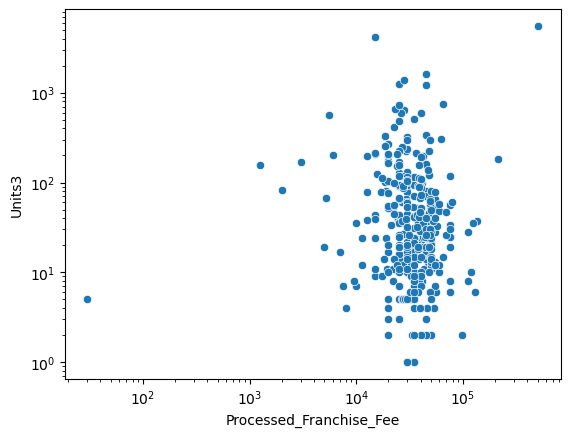

In [19]:
sns.scatterplot(data = new_data_3yr, x = 'Processed_Franchise_Fee', y = 'Units3')

# Set x-axis to logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.show()

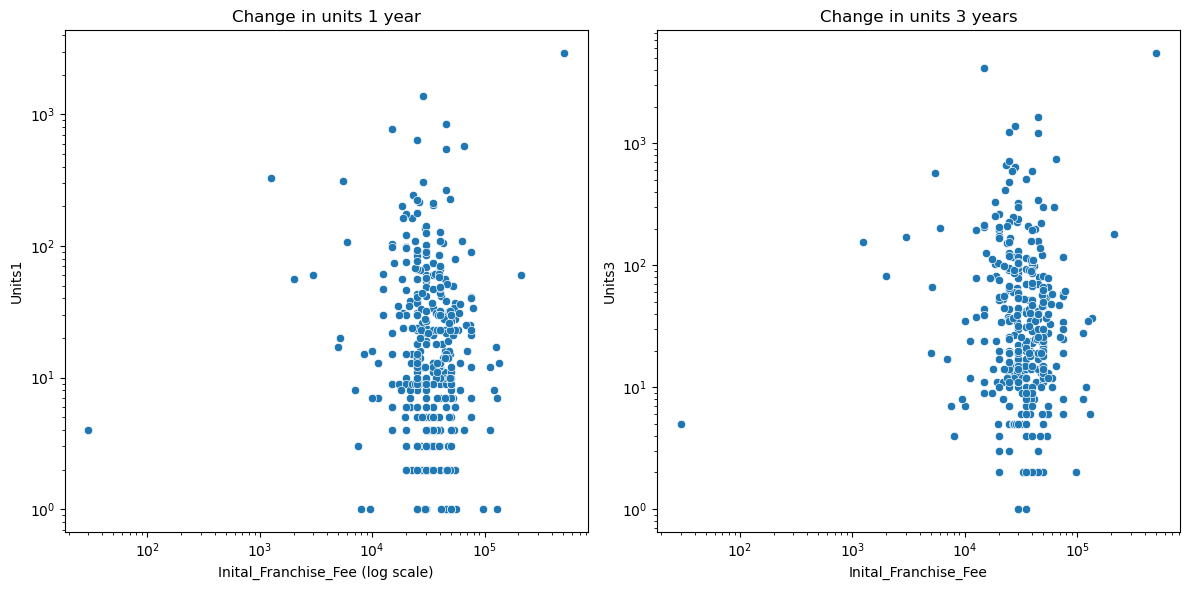

In [20]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot 1
sns.scatterplot(data=new_data_1yr, x= 'Processed_Franchise_Fee', y='Units1', ax=ax1)
ax1.set_title('Change in units 1 year')
ax1.set_xlabel('Inital_Franchise_Fee (log scale)')
ax1.set_ylabel('Units1')
ax1.set_xscale('log')
ax1.set_yscale('log')

# Scatter plot 2
sns.scatterplot(data=new_data_3yr, x='Processed_Franchise_Fee', y='Units3', ax=ax2)
ax2.set_title('Change in units 3 years')
ax2.set_xlabel('Inital_Franchise_Fee')
ax2.set_ylabel('Units3')
ax2.set_xscale('log')
ax2.set_yscale('log')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## insight:  We would assume that the more that the stock upscales, the more expensivie would be the inital franchise fee.  From the scatterplot we see that there is no correlation between change in units and inital franchise fee.

<br>
<br>
<br>

## So what does change the value of the compapny?

--------

#### We want to know what gives advantage of companies over others.  We will check if 'Parent Company' have an impact on the rank


What is a Parent Company?

In [21]:
founded_df = df[['2016 Rank', 'Company', 'Category Detail', 'Parent Company']]
founded_df.head(10)

,2016 Rank,Company,Category Detail,Parent Company
0,1,Jimmy John's Sandwiches,Sandwiches,Jimmy John's LLC
1,2,Hampton by Hilton,Midprice hotels,Hilton Worldwide
2,3,Supercuts,Hair salons,Regis
3,4,Servpro,Insurance/disaster restoration and cleaning,Servpro Industries Inc.
4,5,Subway,"Subs, salads",Doctor's Associates
5,6,McDonald's,"Burgers, chicken, salads, beverages",NaN
6,7,7-Eleven Inc.,Convenience stores,"Seven & i Holdings Co., Ltd."
7,8,Dunkin' Donuts,"Coffee, doughnuts, baked goods",Dunkin' Brands
8,9,Denny's Inc.,Family restaurants,Denny's Inc.
9,10,Anytime Fitness,Fitness centers,Self Esteem Brands


In [22]:
# We decided to take the top 15 ranking companies and the last 15 companies 
# and count the total amount of 'Parent Company' per group

# Select the first 15 rows
top_15_companies = founded_df.loc[:15,]

# Select the last 15 rows
last_15_companies = founded_df.iloc[-15:]


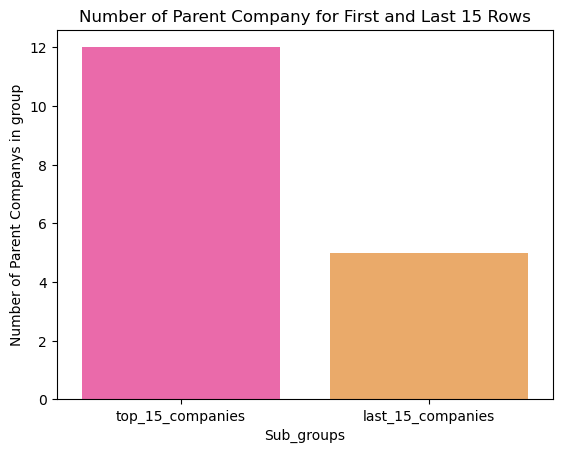

In [23]:
# We weren't able to count rows that have 'Parent company' instead we counted out the 'null' rows.

# Specify the column you want to count non-null values for
column_to_count = 'Parent Company'

# Count non-null values for the first 15 rows
count_first_15_rows = top_15_companies[column_to_count].count()

# Count non-null values for the last 15 rows
count_last_15_rows = last_15_companies[column_to_count].count()

# Create a bar plot
sns.barplot(x=['top_15_companies', 'last_15_companies'], y=[count_first_15_rows, count_last_15_rows], palette= 'spring')

# Set plot labels and title
plt.xlabel('Sub_groups')
plt.ylabel('Number of Parent Companys in group')
plt.title(f'Number of {column_to_count} for First and Last 15 Rows')

# Display the plot
plt.show()



### We can learn from here that having a parent company haves a siginificent impact on the ranking of the company!

<br>
<br>
<br>

<div>
<img src="https://github.com/ChadSim/images/blob/main/grootCoding.jpg?raw=true" width="1200"/> 
</div>

---------
<br>
<br>
<br>

---------

# A2 - Inital investment - Does category matters?

In [24]:
df[["Initial Investment"]].fillna(0).head(5)

,Initial Investment
0,"325,500"
1,"4,213,600"
2,"144,400"
3,"156,075"
4,"116,600"


In [25]:
df[["High"]].fillna(0).head(5)

,High
0,"555,000"
1,"14,896,500"
2,"293,800"
3,"209,950"
4,"263,150"


In [26]:
df['High']

0         555,000 
1      14,896,500 
2         293,800 
3         209,950 
4         263,150 
          ...     
494       336,800 
495       913,600 
496        81,415 
497       197,950 
498        64,770 
Name: High, Length: 499, dtype: object

In [27]:
df['Initial Investment'] = df['Initial Investment'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)

df['Initial Investment'] = df['Initial Investment'].fillna(0).astype(int)
df['High'] = df['High'].fillna(0).astype(int)

In [28]:
investment = df.groupby('Category Detail')['Initial Investment'].agg(['min', 'max']).sort_values(by='max',ascending=False)
len(investment)

412

In [29]:
data_10_first = investment.head(10)
data_10_first

,min,max
Category Detail,,
Upscale hotels and resorts,35493750,55999500
Upscale all-suite hotels,28460000,28460000
Upscale midprice hotels,11669500,11669500
Upscale extended-stay hotels,10899500,10899500
Hotels,102384,7530521
Midprice extended-stay hotels,7423250,7423250
Limited-service extended-stay lodging,5035000,5035000
Midprice hotels,4213600,4213600
Extended-stay lodging,3656600,3656600


<Figure size 1000x600 with 0 Axes>

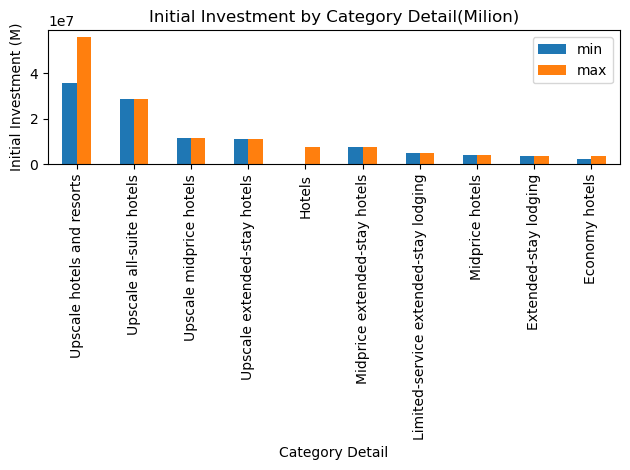

In [30]:
plt.figure(figsize=(10, 6))
data_10_first.plot(kind='bar', y=['min', 'max'])
plt.title('Initial Investment by Category Detail(Milion)')
plt.xlabel('Category Detail')
plt.ylabel('Initial Investment (M)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



# we learn that all top highest initial investment are hotels,  possibile of high cost as a result of of expensive real estate and construction cost

In [31]:
data_10_last = investment.tail(10)
data_10_last

,min,max
Category Detail,,
Workplace training and development,19700,19700
Holiday and event lighting,19550,19550
"Commercial, residential and association property management",19400,19400
"Commercial cleaning, facility services",17000,17000
Recreational billiard leagues,16704,16704
"Windshield repair, glass scratch removal, headlight lens repair",9910,9910
Weekly newspapers distributed at restaurants,9750,9750
Printing and promotional products,4730,4730
"Group fitness classes, conventions, apparel and accessories",3530,3530


<Figure size 1000x600 with 0 Axes>

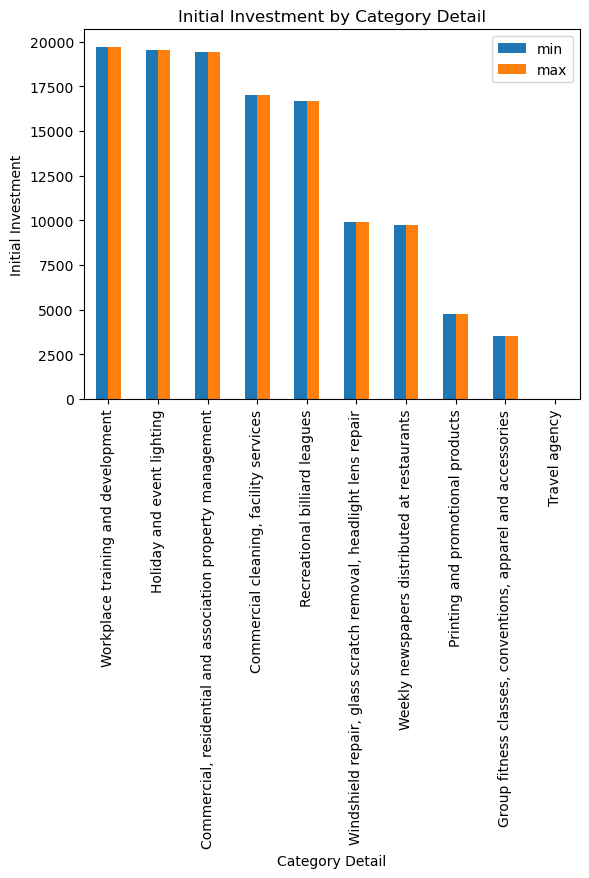

In [32]:
plt.figure(figsize=(10, 6))
data_10_last.plot(kind='bar', y=['min', 'max'])
plt.title('Initial Investment by Category Detail')
plt.xlabel('Category Detail')
plt.ylabel('Initial Investment')
plt.xticks(rotation=90)

plt.show()

## We see that catgory does matter!

## We learn that the inital investment depends on the cost of the real estate, assets ect.  Hotels are costly compared to travel agencies that requrie a low cost as an inital investment!



<br>
<br>
<br>

<div>
<img src="https://github.com/ChadSim/images/blob/main/iLoveDun'.jpg?raw=true" width="500"/> 
</div>

In [33]:
# maybe check for relation of inital investment to inital franchise fee?

------

<br>
<br>
<br>
<br>

------

<br>
<br>

# A3 - Which category have top grossing high-inital investment ratio?

## High - Is the peak of the stock ever reached

In [34]:
df['Initial Investment'] = df['Initial Investment'].astype(int)
df['High'] = df['High'].astype(int)

We created a new column "division", it represents the ratio of the inital investment and the 'High"

In [35]:
df['Division'] = df['High'] / df['Initial Investment']

In [36]:
data_10_big=df['Division'].nlargest(10).index

data_10_big = df.loc[data_10_big]
#data_10_big

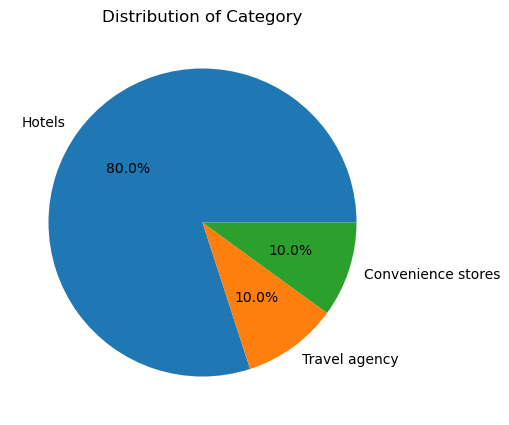

In [37]:
plt.figure(1, figsize=(5,5))
plt.title("Distribution of Category")
data_10_big['Category Detail'].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel("")  
plt.show()

## We find that hotel have the highest ratio between the inital investment and the highest value the company ahcieved in it's history!

In [38]:
data_10_big=df['Division'].nlargest(10).index

data_10_big = df.loc[data_10_big]
data_10_big[['Category Detail', 'Division']]

,Category Detail,Division
72,Travel agency,416.000000
272,Hotels,71.111855
137,Hotels,70.746884
209,Hotels,67.117392
305,Hotels,56.276506
348,Hotels,53.789650
31,Hotels,45.757595
289,Hotels,44.808412
6,Convenience stores,43.956989
468,Hotels,34.698133


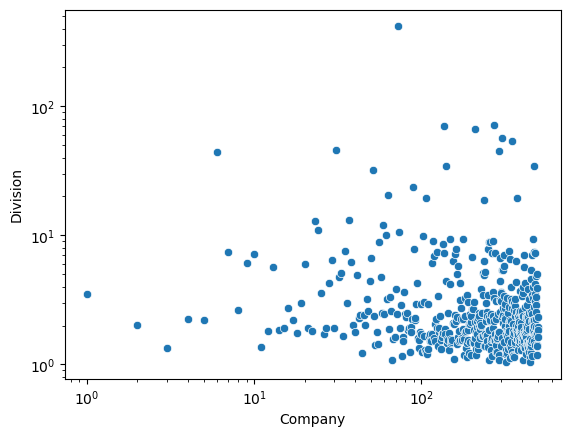

In [39]:
sns.scatterplot(x=df['Company'],y=df['Division'])
plt.xscale('log')
plt.yscale('log')

# Questions?

<br>
<br>
<br>

<div>
<img src="https://github.com/ChadSim/images/blob/main/cartoon1.jpg?raw=true" width="900"/> 
</div>

<br>
<br>
<br>

# Thank You!